# Select Important Features via Various Classification Approaches

<b>Author</b>: Chan, Chun-Hsiang (<b>TooDou</b>) <b>@</b> D04228002 NTU GEOG

<div align="justify">
<b>Introduction</b><br/>
In this project, we would like to analyze the microsoft malware dataset. Through data-driven aspect, we need to extract the important features which is consist of nine different class types (MD1, SEC, !G, DP, IMG!, REG, MISC, ENT, IMG2, SYM, OPC, STR and API, etc.), moreover, we also need to figure out the useless features from the original dataset.<br/><br/>
Although this paper adopted "random forest" as the classifier (Ahmadi et al., 2016), I would like to test other classifiers, and attemped to know the accuracy of them. As a result, there are four classifiers have been adopted, including random forest, extra trees, decision tree and AdaBoost.<br/>
<br/>
<b>Methodology</b><br/>
Due to the test data from the microsoft malware, we cannot to realize the performance of model because it is lack of class type. In order to sovle this problem, we divided the training dataset file (LargeTrain.csv) into two parts, 70% is for model training, and the other 30% is for model testing. In addition, this study not only accepted cross validation (K-Fold validation: K = 10) for the evaluation of model stability, but also utilized eight parameters to optimize the performance of each classifier.<br/><br/>
It is possible to figure the best parameter for each classifier via the procedure above, we adopted four steps to choose the best parameter. The first step is to compute average accuracy difference between the training and test model, and the second is to calculate standard deviation accuracy difference. Then, we summerized these average accuracy difference and standard deviation accuracy difference for each parameter. Nevertheless, we selected the minimum value among these summerized differences, and indicated the index of this corresponded minimum value from parameter vector.<br/><br/>
When the best parameter value for each classifier has been found, we needed to re-built the classifier again by using the whole training dataset, and computed the importance of each feature. As a result, the useful features and useless features have been selected via this procedure. Futhermore, we selected top 10 important features from four different classifiers, and constructed support vector machine (SVM) model to evaluate the potential and performances.<br/>
<br/>
<b>Results and Dicussions</b>
After the parameter optimization, the most suitable parameter has been selected for each classifiers as follows.<br/>
(1) Random Forest Classification :: n_estimators      :: 20<br/>
(2) Decision Tree Classification :: min_samples_split :: 10<br/>
(3) Extra Trees Classificaiton   :: n_estimators      :: 12<br/>
(4) AdaBoost Classification      :: n_estimators      :: 5<br/>
<br/>
For simple model building, the best performance is random forest classification (extra trees classification, decision tree classification and adaboost classification). Moreover, all useful and useless features have been obtained, and the top 10 important features from the analysis of analysis procedure.
<br/><br/>
In order to realize the performances of the top 10 features selected from four different classification models, we adopted support vector machine to evaluate them. The results showed that the best performance is the top10 features generated via extra trees classification, the second is AdaBoost classification, the third is decision tree classification and the fourth is the random forest classification.
<br/><br/>
We could observed the different classification results between using all-features and top10-features. I thought that random forest needs more estimators to contrust a good model, hence, less estimators induced lower the accuracy. According to the mechanism of extra tree classifier, it would randomly choose a group of sub variables and randomly select the cutoff, based on their entropy. As a result, if the dataset contained a great number of useless features, then the performance could not show well, and this is the reason why we could obtain the highest accuracy from extra trees classification. The same concept is also worked on AdaBoost, the more features we had, then the less accuracy we got. This phenomenon have been proved by over-fitting in several researches. Although the last model we constructed via support vector machine, the results still could be explained.
</div>

<b>Part I. Load Data and Import Packages</b> <br/>
1. Set the Path and Load Data <br/>
2. Overview the Whole Dataset

<b>Part II. Build Classification Models</b> <br/>
1. Preview the Training Dataset for Modeling of Classification <br/>
2. Build the Classification Models <br/>
3. Rebuild the Classification Model via Suitable Parameter Values <br/>
4. Evaluate Classification and Cross Validation by Using K-Fold (K = 10) <br/>
5. Statistic Result of Cross Validation on Classification <br/>
6. Sight View of the Importance of Each Feature <br/>
7. Select Three Types of Features

<b>Part III. Model Comparison</b> <br/>
1. Accuracy Comparison <br/>
2. Important Features Comparison

<b>Part III. Model Comparison</b> <br/>
1. Accuracy Comparison <br/>
2. Important Features Comparison

<b>Part IV. Model Validation</b> <br/>
1. Apply SVM to Evaluate the Features <br/>
2. Comparison

For the training dataset, we have 1805 features (included the class type), and 10868 rows of data.<br />
For the test dataset, we have 1805 features (included the class type), and 10873 rows of data.

<b>Reference dataset</b>: https://github.com/ManSoSec/Microsoft-MalwareChallenge <br />
<b>Reference paper</b>: https://arxiv.org/abs/1511.04317

<b>Python</b> version: 3.6.1<br />
<b>Packages requirements</b>:
1. os
2. timeit
3. pandas ver. 0.19.2
4. matplotlib ver. 2.0.0
5. numpy ver. 1.11.3
6. sklearn ver. 0.18.1

# Part I. Load Data and Import Packages

## 1. Set the Path and Load Data

In [1]:
# import packages
import os
import pandas as pd

# load dateset
os.getcwd()
os.chdir('/Users/May/documents/python_code/Microsoft-Malware-Challenge/Dataset/train')
train = pd.read_csv('LargeTrain.csv')
os.chdir('/Users/May/documents/python_code/Microsoft-Malware-Challenge/Dataset/test/')
test = pd.read_csv('LargeTest.csv')

## 2. Overview the Whole Dataset

We applied two functions to view our Microsoft malware dataset (train and test), including head( ) and describe( ).<br />
For the training dataset, we have 1805 features (included the class type), and 10868 rows of data.<br />
For the test dataset, we have 1805 features (included the class type), and 10873 rows of data.<br />
<br />
At last, we plot two figures to present the class distribution of training and test dataset.

In [2]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np

### 2.1 Training Dataset
(actually this is the original dataset which exists in malware/dataset/train)

In [3]:
# view the training dataset
train.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,3,3,583,15,5,1574,5,6,7,30,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,3,3,373,27,9,615,9,16,10,34,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,3,3,77,12,4,66,4,3,0,5,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1


In [4]:
# statistic table of training dataset
train.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000
mean,3.279076,3.500552,1990.713747,11.586861,4.934671,1264.397957,3.845786,16.559717,5.552908,31.011502,...,10840.809901,5067.437155,19206.655962,4861.557508,13055.646853,19358.439179,7070.320482,66860.996319,53866.402926,4.017851
std,0.936296,3.725526,5827.675688,8.986606,2.637995,3902.380905,2.925528,23.203308,7.285566,37.299279,...,18299.174269,4215.541706,23749.881264,4084.822497,10759.321012,24745.353583,5963.469543,66364.332846,53145.701929,2.684621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,58.000000,3.000000,4.000000,37.000000,1.000000,6.000000,0.000000,13.000000,...,1124.000000,1321.000000,3262.000000,1158.750000,3108.000000,3130.750000,1964.750000,11990.250000,7706.000000,2.000000
50%,3.000000,3.000000,513.000000,12.000000,4.000000,364.000000,4.000000,11.000000,4.000000,19.000000,...,5585.500000,5323.500000,14902.000000,5129.500000,14752.000000,14921.000000,7437.500000,62384.500000,45639.000000,3.000000
75%,3.000000,4.000000,1652.500000,18.000000,6.000000,1044.000000,5.000000,17.000000,9.000000,33.250000,...,8464.250000,6040.250000,22314.500000,6020.250000,16078.000000,21464.750000,8414.500000,73929.500000,68580.000000,6.000000
max,34.000000,263.000000,107775.000000,85.000000,58.000000,86560.000000,21.000000,377.000000,166.000000,492.000000,...,189297.000000,24914.000000,214551.000000,25502.000000,63895.000000,212548.000000,38582.000000,397109.000000,322765.000000,9.000000


In [220]:
# get all class types
classLabel = ['Ramnit (R)','Lollipop (L)', 'Kelihos_ver3 (K3)', 'Vundo (V)',\
                      'Simda (S)','Tracur (T)', 'Kelihos_ver1 (K1)', 'Obfuscator.ACY (O)', 'Gatak(G)']
classLabel

['Ramnit (R)',
 'Lollipop (L)',
 'Kelihos_ver3 (K3)',
 'Vundo (V)',
 'Simda (S)',
 'Tracur (T)',
 'Kelihos_ver1 (K1)',
 'Obfuscator.ACY (O)',
 'Gatak(G)']

In [221]:
# plot the class distribution of training data
# observation on the statistics
# count the amount
countTrainRow_class = np.zeros(9)
print('Numbers of rows in each class (Training Data)')
for i in range(1,10):
    countTrainRow_class[i-1] = sum(train.Class==i)
    print(classLabel[i-1],':' , countTrainRow_class[i-1])

Numbers of rows in each class (Training Data)
Ramnit (R) : 1541.0
Lollipop (L) : 2478.0
Kelihos_ver3 (K3) : 2942.0
Vundo (V) : 475.0
Simda (S) : 42.0
Tracur (T) : 751.0
Kelihos_ver1 (K1) : 398.0
Obfuscator.ACY (O) : 1228.0
Gatak(G) : 1013.0


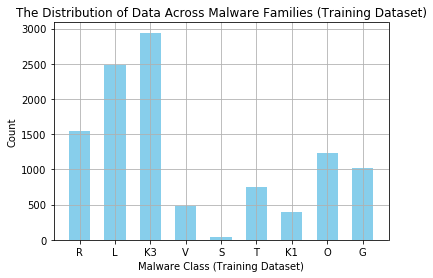

In [222]:
# show the distribution
ind = np.arange(9)+1.5
plt.bar(ind,countTrainRow_class,0.6,color='skyblue',tick_label=\
        ['R','L','K3','V','S','T','K1','O','G'])
plt.xlabel('Malware Class (Training Dataset)')
plt.ylabel('Count')
plt.title('The Distribution of Data Across Malware Families (Training Dataset)')
plt.xticks(ind)
plt.grid(True)
plt.show() 

# Part II. Build Classification Models

We utilized the sklearn packages to bulid up our classifier models, including random forest, extra trees, decision tree and AdaBoost. In order to realize the model performance, we added cross validation score from sklearn.

In [213]:
# import packages
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

To separte the dataset into two parts: data (for building the model) and class (for identify their types)

## 1. Preview the Training Dataset for Modeling of Classification

<div align = "justify">Due to the features in the original training dataset, we need to separte the original training dataset into two parts, one is data, and the other is class type.  Moreover, we partition the original data into two subsets, 75% (8151) is for training, and 25% (2717) is for testing.  In order to obtain the best parameter value for model building, this study attempted to utilize 10 different parameters for testing to avoid model over-fitting.</div>

### 1.1 Separte the Dataset for Features and Label

In [214]:
# features
data = train[train.columns[np.arange(1804)]]
# label
classType = train[train.columns[1804]]

### 1.2 Compute the Numbers of Data

In [215]:
# training part
trainDataNum = data.shape[0]*0.75
print('Number of Training Data: ', int(trainDataNum))
# test part
testDataNum = data.shape[0]*0.25
print('Number of Test Data: ', int(testDataNum))

Number of Training Data:  8151
Number of Test Data:  2717


### 1.3 Partition (70% for training and 30% for test)

Partition the dataset by random sampling without replacement

In [216]:
# training part
trainIndex = np.random.choice(data.shape[0], int(trainDataNum), replace=False)
print('Training Data Index: \n', np.sort(trainIndex))
# test part
trainSelect = np.in1d(range(data.shape[0]),trainIndex)
print('Test Data Index: \n', np.sort(np.arange(data.shape[0])[~trainSelect]))

Training Data Index: 
 [    2     4     5 ..., 10864 10865 10867]
Test Data Index: 
 [    0     1     3 ..., 10858 10859 10866]


### 1.4 Extract the Dataset

In [217]:
# extract training dataset (features and label)
trainData = data[trainSelect]
trainClass = classType[trainSelect]
trainData.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
2,3,4,2796,15,5,625,5,58,11,152,...,16918.0,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0
4,3,3,77,12,4,66,4,3,0,5,...,1256.0,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0
5,3,3,86,6,2,6,2,0,0,1,...,597.0,474.0,561.0,1389.0,581.0,1537.0,1293.0,1275.0,7048.0,6164.0
6,3,3,469,21,7,291,7,43,15,82,...,15658.0,33452.0,15370.0,63663.0,15581.0,42067.0,63996.0,21127.0,221716.0,176170.0
7,3,3,2090,21,7,4035,7,17,8,40,...,1783.0,1378.0,1901.0,4588.0,2004.0,5550.0,4494.0,2803.0,21692.0,18786.0


In [218]:
# extract test dataset (features and label)
testData = data[~trainSelect]
testClass = classType[~trainSelect]
testData.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
0,3,3,689,18,6,890,6,39,17,88,...,8658.0,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0
1,3,3,583,15,5,1574,5,6,7,30,...,650.0,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0
3,3,3,373,27,9,615,9,16,10,34,...,9734.0,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0
12,3,3,49,0,4,54,0,5,0,15,...,11689.0,11360.0,11418.0,30614.0,11466.0,30663.0,30464.0,15118.0,139471.0,131857.0
16,3,3,549,18,6,1450,6,14,5,26,...,682.0,538.0,680.0,1723.0,695.0,1915.0,1739.0,872.0,7936.0,6103.0


### 1.5 View the Numbers of Training and Test Data

In [223]:
# plot the class distribution of training data
# observation on the statistics
# count the amount
countTrainDataRow_class = np.zeros(9)
print('Numbers of rows in each class (Training Data)')
for i in range(1,10):
    countTrainDataRow_class[i-1] = sum(trainClass==i)
    print(classLabel[i-1],':' , countTrainDataRow_class[i-1])

Numbers of rows in each class (Training Data)
Ramnit (R) : 1145.0
Lollipop (L) : 1877.0
Kelihos_ver3 (K3) : 2242.0
Vundo (V) : 347.0
Simda (S) : 28.0
Tracur (T) : 567.0
Kelihos_ver1 (K1) : 307.0
Obfuscator.ACY (O) : 882.0
Gatak(G) : 756.0


In [224]:
# plot the class distribution of test data
# observation on the statistics
# count the amount
countTestDataRow_class = np.zeros(9)
print('Numbers of rows in each class (Test Data)')
for i in range(1,10):
    countTestDataRow_class[i-1] = sum(testClass==i)
    print(classLabel[i-1],':' , countTestDataRow_class[i-1])

Numbers of rows in each class (Test Data)
Ramnit (R) : 396.0
Lollipop (L) : 601.0
Kelihos_ver3 (K3) : 700.0
Vundo (V) : 128.0
Simda (S) : 14.0
Tracur (T) : 184.0
Kelihos_ver1 (K1) : 91.0
Obfuscator.ACY (O) : 346.0
Gatak(G) : 257.0


### 1.6 View the Training and Test Data Distribution

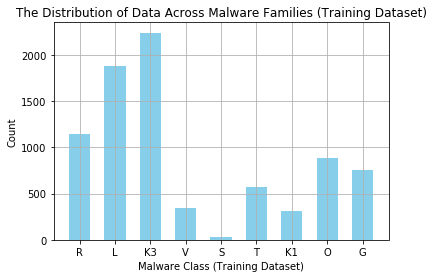

In [226]:
# show the distribution
ind = np.arange(9)+1.5
plt.bar(ind,countTrainDataRow_class,0.6,color='skyblue',tick_label=\
        ['R','L','K3','V','S','T','K1','O','G'])
plt.xlabel('Malware Class (Training Dataset)')
plt.ylabel('Count')
plt.title('The Distribution of Data Across Malware Families (Training Dataset)')
plt.xticks(ind)
plt.grid(True)
plt.show() 

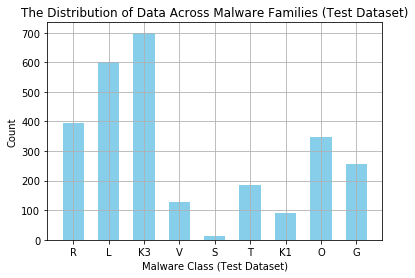

In [227]:
# show the distribution
ind = np.arange(9)+1.5
plt.bar(ind,countTestDataRow_class,0.6,color='skyblue',tick_label=\
        ['R','L','K3','V','S','T','K1','O','G'])
plt.xlabel('Malware Class (Test Dataset)')
plt.ylabel('Count')
plt.title('The Distribution of Data Across Malware Families (Test Dataset)')
plt.xticks(ind)
plt.grid(True)
plt.show() 

## 2. Build the Classification Models

In order to figure the best parameter value for model building, we attempted to accept the cross validationa and different to aviod over-fitting problem.

## 2.1 Basic Setting

In [251]:
# in order to measure the run time of classification, we adopted "timeit" packages to calculate the duration time.
import timeit

In [369]:
parameters = np.array([5,10,15,20,25,30,35,40])
parameters1 = np.array([2,4,6,8,10,12,14,16])

## 2.2 Parameter Optimization

### 2.2.1 Declare Variables

In [367]:
rfc_trainScores = np.zeros((10, parameters.shape[0]))
rfc_testScores = np.zeros((10, parameters.shape[0]))

dtc_trainScores = np.zeros((10, parameters.shape[0]))
dtc_testScores = np.zeros((10, parameters.shape[0]))

etc_trainScores = np.zeros((10, parameters.shape[0]))
etc_testScores = np.zeros((10, parameters.shape[0]))

abc_trainScores = np.zeros((10, parameters.shape[0]))
abc_testScores = np.zeros((10, parameters.shape[0]))

### 2.2.2 Model Fitting for Different Parameters <br/ ><br/ >A. Random Forest Classification

In [390]:
# for the training part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    rfc_clf = RandomForestClassifier(n_estimators=para, max_depth=None, min_samples_split=2, random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(rfc_clf, trainData, trainClass, cv=10)
    # store the score of each run in the column
    rfc_trainScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('RFC training time: ', stop - start) 

RFC training time:  112.91422584400425


In [391]:
# for the test part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    rfc_clf = RandomForestClassifier(n_estimators=para, max_depth=None, min_samples_split=2, random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(rfc_clf, testData, testClass, cv=10)
    # store the score of each run in the column
    rfc_testScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('RFC test time: ', stop - start) 

RFC test time:  33.893723917004536


### B. Decision Tree Classification

In [370]:
# for the training part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters1.shape[0]):
    # define the parameters
    para = parameters1[i] 
    # build random forest classification model
    dtc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=para,random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(dtc_clf, trainData, trainClass, cv=10)
    # store the score of each run in the column
    dtc_trainScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('DTC training time: ', stop - start)

DTC training time:  228.75648721900507


In [371]:
# for the test part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters1.shape[0]):
    # define the parameters
    para = parameters1[i] 
    # build random forest classification model
    dtc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=para,random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(dtc_clf, testData, testClass, cv=10)
    # store the score of each run in the column
    dtc_testScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('DTC test time: ', stop - start) 

DTC test time:  68.14934703100153


### C. Extra Trees Classification

In [372]:
# for the training part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    etc_clf = ExtraTreesClassifier(n_estimators=para, max_depth=None, min_samples_split=2, random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(etc_clf, trainData, trainClass, cv=10)
    # store the score of each run in the column
    etc_trainScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('ETC training time: ', stop - start)

ETC training time:  53.73961375300132


In [373]:
# for the test part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    etc_clf = ExtraTreesClassifier(n_estimators=para, max_depth=None, min_samples_split=2, random_state=0)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(etc_clf, testData, testClass, cv=10)
    # store the score of each run in the column
    etc_testScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('ETC test time: ', stop - start) 

ETC test time:  20.065353678000974


### D. AdaBoost Classification

In [374]:
# for the training part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    abc_clf = AdaBoostClassifier(n_estimators=para)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(abc_clf, trainData, trainClass, cv=10)
    # store the score of each run in the column
    abc_trainScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('ABC training time: ', stop - start)

ABC training time:  898.987740353994


In [375]:
# for the test part
# start to count
start = timeit.default_timer()

# model fitting
for i in range(0,parameters.shape[0]):
    # define the parameters
    para = parameters[i] 
    # build random forest classification model
    abc_clf = AdaBoostClassifier(n_estimators=para)
    # cross validation with 10-fold validation for random forest classification
    x = cross_val_score(abc_clf, testData, testClass, cv=10)
    # store the score of each run in the column
    abc_testScores[:,i] = x

# stop to count
stop = timeit.default_timer()
print ('ABC test time: ', stop - start) 

ABC test time:  306.74147648300277


### 2.2.3 Statistic Analysis for Modeling

### A. Random Forest Classification

In [392]:
# compute the average scores of each run from cross validation results
# training part
rfc_AVGtrainScores = np.zeros(parameters.shape[0])
rfc_STDtrainScores = np.zeros(parameters.shape[0])
for i in range(0,parameters.shape[0]):
    rfc_AVGtrainScores[i] = np.mean(rfc_trainScores[:,i])
    rfc_STDtrainScores[i] = np.std(rfc_trainScores[:,i])
    
# test part
rfc_AVGtestScores = np.zeros(parameters.shape[0])
rfc_STDtestScores = np.zeros(parameters.shape[0])
for i in range(0,parameters.shape[0]):
    rfc_AVGtestScores[i] = np.mean(rfc_testScores[:,i])
    rfc_STDtestScores[i] = np.std(rfc_testScores[:,i])

### B. Decision Tree Classification

In [377]:
# compute the average scores of each run from cross validation results
# training part
dtc_AVGtrainScores = np.zeros(parameters1.shape[0])
dtc_STDtrainScores = np.zeros(parameters1.shape[0])
for i in range(0,parameters1.shape[0]):
    dtc_AVGtrainScores[i] = np.mean(dtc_trainScores[:,i])
    dtc_STDtrainScores[i] = np.std(dtc_trainScores[:,i])
    
# test part
dtc_AVGtestScores = np.zeros(parameters1.shape[0])
dtc_STDtestScores = np.zeros(parameters1.shape[0])
for i in range(0,parameters1.shape[0]):
    dtc_AVGtestScores[i] = np.mean(dtc_testScores[:,i])
    dtc_STDtestScores[i] = np.std(dtc_testScores[:,i])

### C. Extra Trees Classification

In [378]:
# compute the average scores of each run from cross validation results
# training part
etc_AVGtrainScores = np.zeros(parameters1.shape[0])
etc_STDtrainScores = np.zeros(parameters1.shape[0])
for i in range(0,parameters1.shape[0]):
    etc_AVGtrainScores[i] = np.mean(etc_trainScores[:,i])
    etc_STDtrainScores[i] = np.std(etc_trainScores[:,i])
    
# test part
etc_AVGtestScores = np.zeros(parameters1.shape[0])
etc_STDtestScores = np.zeros(parameters1.shape[0])
for i in range(0,parameters1.shape[0]):
    etc_AVGtestScores[i] = np.mean(etc_testScores[:,i])
    etc_STDtestScores[i] = np.std(etc_testScores[:,i])

### D. AdaBoost Classification

In [379]:
# compute the average scores of each run from cross validation results
# training part
abc_AVGtrainScores = np.zeros(parameters.shape[0])
abc_STDtrainScores = np.zeros(parameters.shape[0])
for i in range(0,parameters.shape[0]):
    abc_AVGtrainScores[i] = np.mean(abc_trainScores[:,i])
    abc_STDtrainScores[i] = np.std(abc_trainScores[:,i])
    
# test part
abc_AVGtestScores = np.zeros(parameters.shape[0])
abc_STDtestScores = np.zeros(parameters.shape[0])
for i in range(0,parameters.shape[0]):
    abc_AVGtestScores[i] = np.mean(abc_testScores[:,i])
    abc_STDtestScores[i] = np.std(abc_testScores[:,i])

### 2.2.4 Plot the Accuracy Distribution of Each Parameter

### A. Random Forest Classification

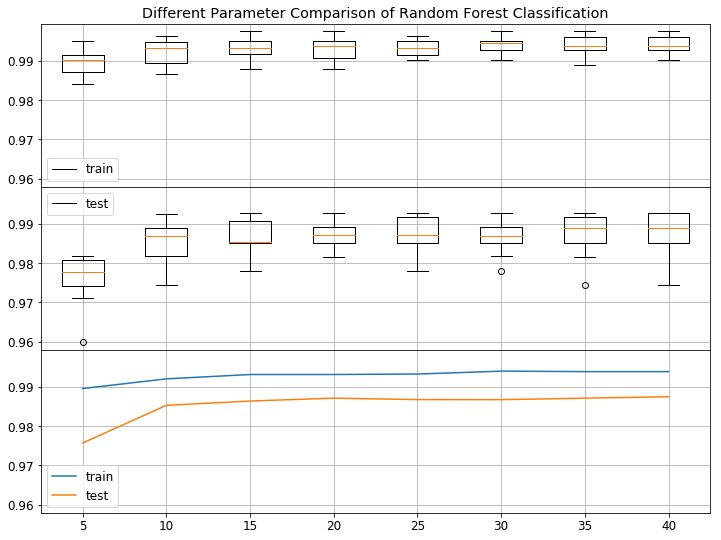

In [393]:
# show the accuracy for each parameter
# training parameter accuracy
plt.rcParams["figure.figsize"] = (12,9)
plt.rc('font', size=12)
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.boxplot(rfc_trainScores)
ax1.legend(['train'])
ax1.grid(True)
ax1.set_title('Different Parameter Comparison of Random Forest Classification')

# test parameter accuracy
ax2.boxplot(rfc_testScores)
ax2.legend(['test'])
ax2.grid(True)

# average accurancy of training and test data among different parameters
trainLine, = ax3.plot(np.arange(parameters.shape[0])+1, rfc_AVGtrainScores, label = "train")
testLine, = ax3.plot(np.arange(parameters.shape[0])+1, rfc_AVGtestScores, label = "test")
plt.legend(handles=[trainLine, testLine])
plt.xticks(np.arange(parameters.shape[0])+1,parameters)
ax3.grid(True)
f.subplots_adjust(hspace=0)
plt.show()
f.savefig("Different Parameter Comparison of Random Forest Classification.png", dpi = 400)

### B. Decision Tree Classification

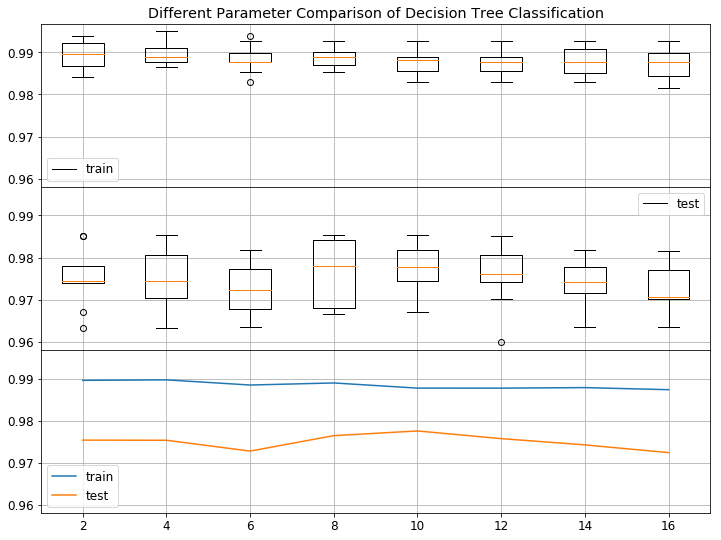

In [395]:
# show the accuracy for each parameter
# training parameter accuracy
plt.rcParams["figure.figsize"] = (12,9)
plt.rc('font', size=12)
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.boxplot(dtc_trainScores)
ax1.legend(['train'])
ax1.grid(True)
ax1.set_title('Different Parameter Comparison of Decision Tree Classification')

# test parameter accuracy
ax2.boxplot(dtc_testScores)
ax2.legend(['test'])
ax2.grid(True)

# average accurancy of training and test data among different parameters
trainLine, = ax3.plot(np.arange(parameters1.shape[0])+1, dtc_AVGtrainScores, label = "train")
testLine, = ax3.plot(np.arange(parameters1.shape[0])+1, dtc_AVGtestScores, label = "test")
plt.legend(handles=[trainLine, testLine])
plt.xticks(np.arange(parameters1.shape[0])+1,parameters1)
ax3.grid(True)
f.subplots_adjust(hspace=0)
plt.show()
f.savefig("Different Parameter Comparison of Decision Tree Classification.png", dpi = 400)

### C. Extra Trees Classification

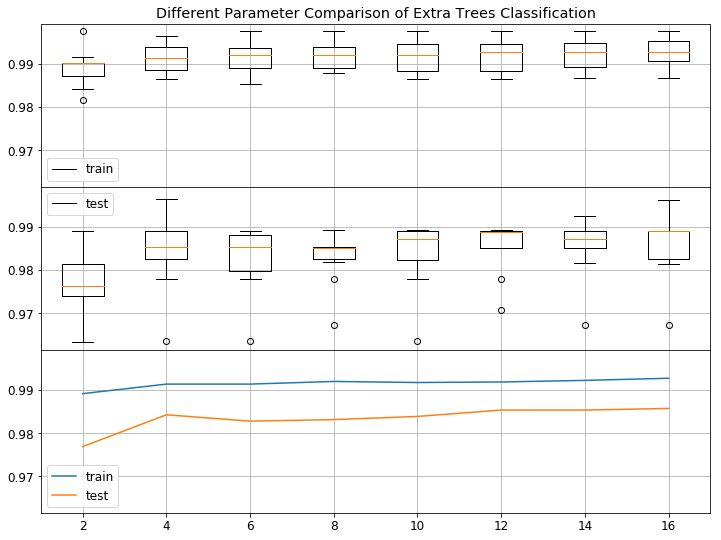

In [396]:
# show the accuracy for each parameter
# training parameter accuracy
plt.rcParams["figure.figsize"] = (12,9)
plt.rc('font', size=12)
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.boxplot(etc_trainScores)
ax1.legend(['train'])
ax1.grid(True)
ax1.set_title('Different Parameter Comparison of Extra Trees Classification')

# test parameter accuracy
ax2.boxplot(etc_testScores)
ax2.legend(['test'])
ax2.grid(True)

# average accurancy of training and test data among different parameters
trainLine, = ax3.plot(np.arange(parameters1.shape[0])+1, etc_AVGtrainScores, label = "train")
testLine, = ax3.plot(np.arange(parameters1.shape[0])+1, etc_AVGtestScores, label = "test")
plt.legend(handles=[trainLine, testLine])
plt.xticks(np.arange(parameters1.shape[0])+1,parameters1)
ax3.grid(True)
f.subplots_adjust(hspace=0)
plt.show()
f.savefig("Different Parameter Comparison of Extra Trees Classification.png", dpi = 400)

### D. AdaBoost Classification

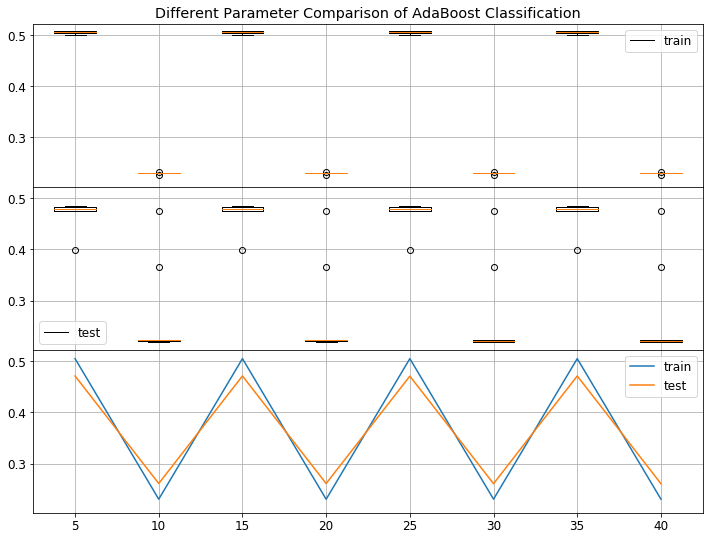

In [397]:
# show the accuracy for each parameter
# training parameter accuracy
plt.rcParams["figure.figsize"] = (12,9)
plt.rc('font', size=12)
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.boxplot(abc_trainScores)
ax1.legend(['train'])
ax1.grid(True)
ax1.set_title('Different Parameter Comparison of AdaBoost Classification')

# test parameter accuracy
ax2.boxplot(abc_testScores)
ax2.legend(['test'])
ax2.grid(True)

# average accurancy of training and test data among different parameters
trainLine, = ax3.plot(np.arange(parameters.shape[0])+1, abc_AVGtrainScores, label = "train")
testLine, = ax3.plot(np.arange(parameters.shape[0])+1, abc_AVGtestScores, label = "test")
plt.legend(handles=[trainLine, testLine])
plt.xticks(np.arange(parameters.shape[0])+1,parameters)
ax3.grid(True)
f.subplots_adjust(hspace=0)
plt.show()
f.savefig("Different Parameter Comparison of AdaBoost Classification.png", dpi = 400)

### 2.2.5 Indicate the Most Suitable Parameter for this Model

The major concept for the selection of best parameter is simple, we utilized the average accuracy of each parameter and standard deviation accuracy of each parameter. Then, we computed the distance between training accuracy and test accurancy of each parameter, and summarized the same parameter values from average and standard deviation. At last, we chose the minimum value and its corresponed parameter value.

assume that we have i parameters
for each run we have i*k accuracy value under k-fold cross validation
compute 
avg_i
$$

### A. Random Forest Classification

In [410]:
# compute the distance between training data and test data
print('Random Forest Classification')
rfc_avg = abs(rfc_AVGtrainScores - rfc_AVGtestScores)
rfc_std = abs(rfc_STDtrainScores - rfc_STDtestScores)
print('Average of Accurancy:\n',rfc_avg)
print('Standard Deviation of Accurancy:\n',rfc_std)

# summerize two statistic values
rfc_overall = rfc_avg + rfc_std
print('Overall Value:\n',rfc_overall)

# select the minimum value which represents the best stability among these parameters
rfc_minIndex = np.argmin(rfc_overall)
print('Minimum Index: ',rfc_minIndex)

# extract the corresponded parameter value from the original parameter set
rfc_para = parameters[rfc_minIndex]
print('The Best Parameter Value: ',rfc_para)

Random Forest Classification
Average of Accurancy:
 [ 0.01384653  0.00673628  0.00674675  0.00601416  0.00649794  0.00725098
  0.00675336  0.0063836 ]
Standard Deviation of Accurancy:
 [ 0.00304235  0.00176275  0.00168871  0.00070968  0.00295258  0.0022789
  0.00304954  0.00333991]
Overall Value:
 [ 0.01688888  0.00849903  0.00843546  0.00672384  0.00945053  0.00952988
  0.00980291  0.00972351]
Minimum Index:  3
The Best Parameter Value:  20


### B. Decision Tree Classification

In [415]:
# compute the distance between training data and test data
print('Decision Tree Classification')
dtc_avg = abs(dtc_AVGtrainScores - dtc_AVGtestScores)
dtc_std = abs(dtc_STDtrainScores - dtc_STDtestScores)
print('Average of Accurancy:\n',dtc_avg)
print('Standard Deviation of Accurancy:\n',dtc_std)

# summerize two statistic values
dtc_overall = dtc_avg + dtc_std
print('Overall Value:\n',dtc_overall)

# select the minimum value which represents the best stability among these parameters
dtc_minIndex = np.argmin(dtc_overall)
print('Minimum Index: ',dtc_minIndex)

# extract the corresponded parameter value from the original parameter set
dtc_para = parameters1[dtc_minIndex]
print('The Best Parameter Value: ',dtc_para)

Decision Tree Classification
Average of Accurancy:
 [ 0.01420886  0.01435761  0.01570545  0.0125243   0.01018348  0.01200466
  0.01361743  0.01496537]
Standard Deviation of Accurancy:
 [ 0.00331297  0.00429646  0.00290164  0.00560147  0.00311655  0.0039464
  0.00154612  0.00181619]
Overall Value:
 [ 0.01752183  0.01865406  0.01860709  0.01812577  0.01330003  0.01595106
  0.01516355  0.01678156]
Minimum Index:  4
The Best Parameter Value:  10


### C. Extra Trees Classification

In [414]:
# compute the distance between training data and test data
print('Extra Trees Classification')
etc_avg = abs(etc_AVGtrainScores - etc_AVGtestScores)
etc_std = abs(etc_STDtrainScores - etc_STDtestScores)
print('Average of Accurancy:\n',etc_avg)
print('Standard Deviation of Accurancy:\n',etc_std)

# summerize two statistic values
etc_overall = etc_avg + etc_std
print('Overall Value:\n',etc_overall)

# select the minimum value which represents the best stability among these parameters
etc_minIndex = np.argmin(etc_overall)
print('Minimum Index: ',etc_minIndex)

# extract the corresponded parameter value from the original parameter set
etc_para = parameters1[etc_minIndex]
print('The Best Parameter Value: ',etc_para)

Extra Trees Classification
Average of Accurancy:
 [ 0.01225501  0.00709576  0.00857184  0.00882925  0.00784444  0.00650018
  0.00686436  0.00698251]
Standard Deviation of Accurancy:
 [ 0.00438281  0.00526092  0.00407268  0.00307688  0.00394296  0.00213265
  0.00321676  0.00407009]
Overall Value:
 [ 0.01663782  0.01235669  0.01264452  0.01190613  0.0117874   0.00863282
  0.01008112  0.0110526 ]
Minimum Index:  5
The Best Parameter Value:  12


### D. AdaBoost Classification

In [413]:
# compute the distance between training data and test data
print('Random Forest Classification')
abc_avg = abs(abc_AVGtrainScores - abc_AVGtestScores)
abc_std = abs(abc_STDtrainScores - abc_STDtestScores)
print('Average of Accurancy:\n',abc_avg)
print('Standard Deviation of Accurancy:\n',abc_std)

# summerize two statistic values
abc_overall = abc_avg + abc_std
print('Overall Value:\n',abc_overall)

# select the minimum value which represents the best stability among these parameters
abc_minIndex = np.argmin(abc_overall)
print('Minimum Index: ',abc_minIndex)

# extract the corresponded parameter value from the original parameter set
abc_para = parameters[abc_minIndex]
print('The Best Parameter Value: ',abc_para)

Random Forest Classification
Average of Accurancy:
 [ 0.03382871  0.030607    0.03382871  0.0307294   0.03419908  0.03023663
  0.03382871  0.03023663]
Standard Deviation of Accurancy:
 [ 0.02230731  0.08180434  0.02230731  0.08181701  0.02217815  0.08198552
  0.02230731  0.08198552]
Overall Value:
 [ 0.05613602  0.11241134  0.05613602  0.11254641  0.05637724  0.11222215
  0.05613602  0.11222215]
Minimum Index:  0
The Best Parameter Value:  5


## 3. Rebuild the Classification Model via Suitable Parameter Values

For example, we selected 20 as the number of estimator for random forest classification As a result, we set the final veriosn model for random forest cassification.

In [416]:
# build random forest classification model
rfc_clf = RandomForestClassifier(n_estimators=rfc_para, max_depth=None, min_samples_split=2, random_state=0)

In [417]:
# build decision tree classification model
dtc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=dtc_para,random_state=0)

In [418]:
# build extra trees classification model
etc_clf = ExtraTreesClassifier(n_estimators=etc_para, max_depth=None,min_samples_split=2, random_state=0)

In [419]:
# build AdaBoost classification model
abc_clf = AdaBoostClassifier(n_estimators=abc_para)

## 4. Evaluate Classification and Cross Validation by Using K-fold (K = 10)

In [422]:
# cross validation with 10-fold validation for random forest classification
rfc_scores = cross_val_score(rfc_clf, data, classType, cv=10)

In [423]:
# cross validation with 10-fold validation for decision tree classification
dtc_scores = cross_val_score(dtc_clf, data, classType, cv=10)

In [424]:
# cross validation with 10-fold validation for extra trees classification
etc_scores = cross_val_score(etc_clf, data, classType, cv=10)

In [425]:
# cross validation with 10-fold validation for AdaBoost classification
abc_scores = cross_val_score(abc_clf, data, classType, cv=10)

## 5. Statistic Result of Cross Validation on Classification

In [426]:
# calculate the Accuracy of random forest classification and show them on the screen
print('Model Accuracy of Random Forest Classification of Each Fold')
print(rfc_scores)
print('\nAverage Accuracy of Random Forest Classification')
print(rfc_scores.mean())

Model Accuracy of Random Forest Classification of Each Fold
[ 0.996337    0.99357798  0.99632353  0.99264029  0.99448022  0.99447514
  0.99355433  0.99631676  0.99538319  0.99168975]

Average Accuracy of Random Forest Classification
0.994477819278


In [427]:
# calculate the Accuracy of decision tree classification and show them on the screen
print('Accuracy of Decision Tree Classification of Each Fold')
print(dtc_scores)
print('\nAverage Accuracy of Decision Tree Classification')
print(dtc_scores.mean())

Accuracy of Decision Tree Classification of Each Fold
[ 0.99175824  0.99357798  0.98713235  0.98620055  0.9825207   0.98895028
  0.98895028  0.99447514  0.98430286  0.98614958]

Average Accuracy of Decision Tree Classification
0.988401796502


In [428]:
# calculate the Accuracy of extra trees classification and show them on the screen
print('Model Accuracy of Extra Trees Classification of Each Fold')
print(etc_scores)
print('\nAverage Accuracy of Extra Trees Classification')
print(etc_scores.mean())

Model Accuracy of Extra Trees Classification of Each Fold
[ 0.99542125  0.99082569  0.99448529  0.99080037  0.98804048  0.9907919
  0.9907919   0.99631676  0.99261311  0.99168975]

Average Accuracy of Extra Trees Classification
0.992177648888


In [429]:
# calculate the Accuracy of AdaBoost classification and show them on the screen
print('Accuracy of AdaBoost classification of Each Fold')
print(abc_scores)
print('\nAverage Accuracy of AdaBoost classification')
print(abc_scores.mean())

Accuracy of AdaBoost classification of Each Fold
[ 0.496337    0.5         0.49816176  0.49770009  0.49586017  0.5
  0.50092081  0.50092081  0.49953832  0.49953832]

Average Accuracy of AdaBoost classification
0.498897727822


## 6. Sight View of the Importnace of Each Feature

The Feature Importance of Random Forest Classifier = 
 [  2.17184326e-04   0.00000000e+00   2.77437925e-04 ...,   1.41892105e-05
   7.30011764e-05   1.04857926e-03]


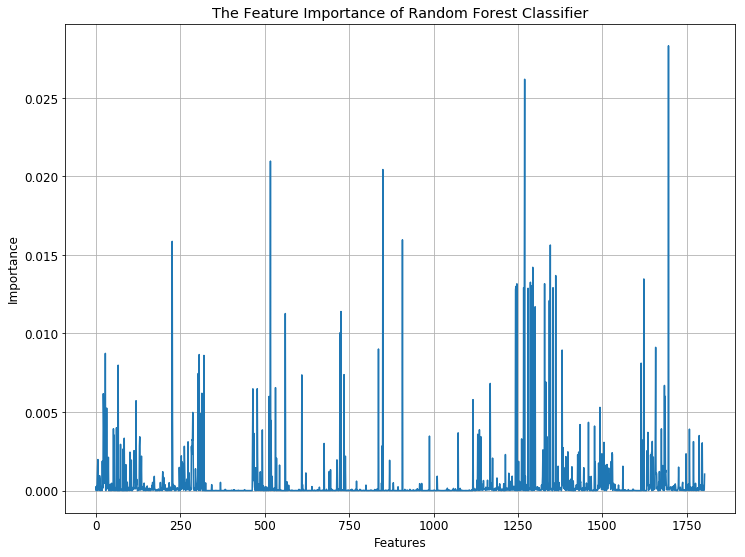

In [430]:
# compute the importance of the features under random forest classification
rfc_clf.fit(data, classType)
print('The Feature Importance of Random Forest Classifier = \n',rfc_clf.feature_importances_)
plt.plot(rfc_clf.feature_importances_)
plt.title('The Feature Importance of Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of Decision Tree Classifier = 
 [ 0.          0.00022345  0.         ...,  0.          0.          0.        ]


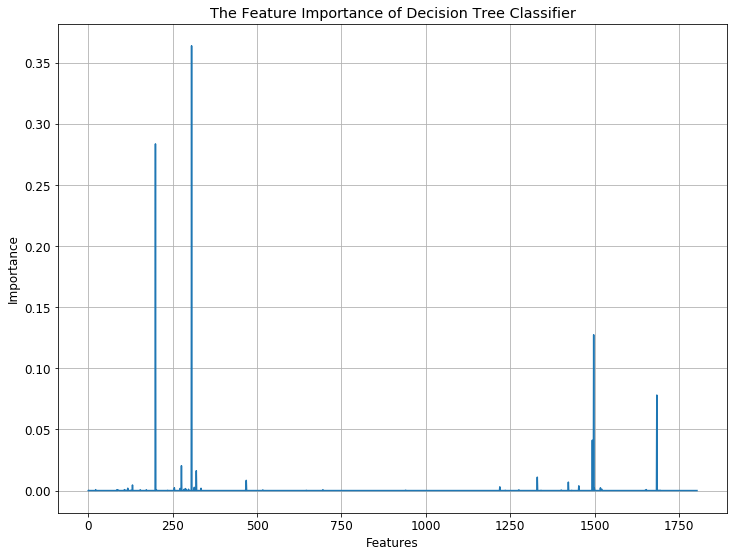

In [431]:
# compute the importance of the features under decision tree classification
dtc_clf.fit(data, classType)
print('The Feature Importance of Decision Tree Classifier = \n',dtc_clf.feature_importances_)
plt.plot(dtc_clf.feature_importances_)
plt.title('The Feature Importance of Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of Extra Trees Classifier = 
 [ 0.00049798  0.0003142   0.00039223 ...,  0.          0.00595362
  0.0020207 ]


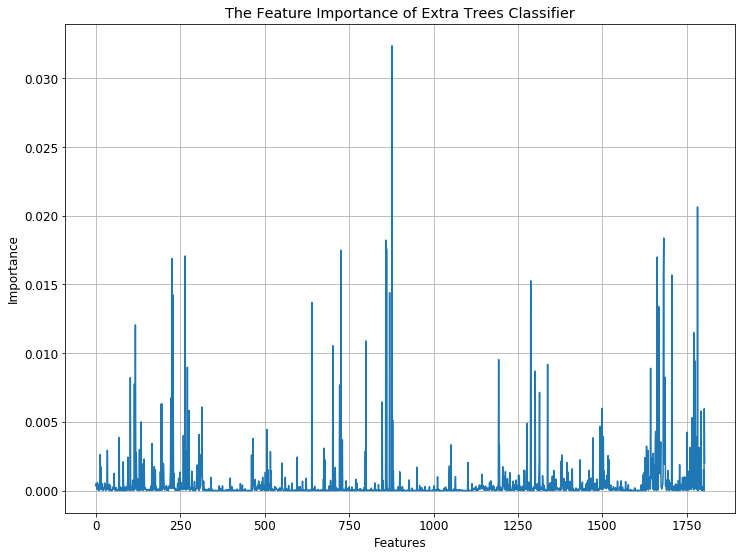

In [432]:
# compute the importance of the features under extra trees classification
etc_clf.fit(data, classType)
print('The Feature Importance of Extra Trees Classifier = \n',etc_clf.feature_importances_)
plt.plot(etc_clf.feature_importances_)
plt.title('The Feature Importance of Extra Trees Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of AdaBoost Classifier = 
 [ 0.  0.  0. ...,  0.  0.  0.]


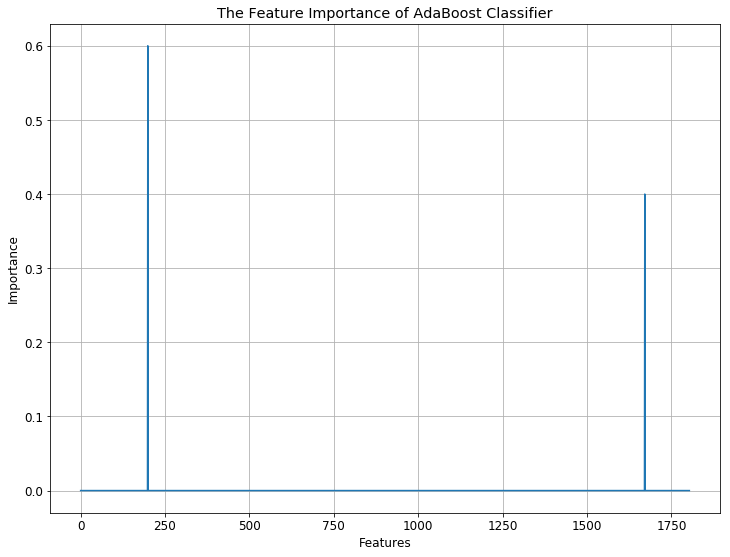

In [433]:
# compute the importance of the features under AdaBoost classification
abc_clf.fit(data, classType)
print('The Feature Importance of AdaBoost Classifier = \n',abc_clf.feature_importances_)
plt.plot(abc_clf.feature_importances_)
plt.title('The Feature Importance of AdaBoost Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

## 7. Select Three Types of Features

From previous analysis results, we can realize that some of features does not help for classification during this process, hence, we attempted to divide into three types of feature type as follows. <br />
1. top 10 useful features
2. all useful features
3. all useless features

(p.s. for no.2 and no.3:: because the numbers of features are quite large, we also showed the numbers.)

### 7.1 Get the Importance Index

In [434]:
# random forest classification
# export the importance and obtain the sorting index
rfc_featureImportance = rfc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
rfc_getIndex = np.argsort(rfc_featureImportance)

In [435]:
# decision tree classification
# export the importance and obtain the sorting index
dtc_featureImportance = dtc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
dtc_getIndex = np.argsort(dtc_featureImportance)

In [436]:
# extra trees classification
# export the importance and obtain the sorting index
etc_featureImportance = etc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
etc_getIndex = np.argsort(etc_featureImportance)

In [437]:
# AdaBoost classification
# export the importance and obtain the sorting index
abc_featureImportance = abc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
abc_getIndex = np.argsort(abc_featureImportance)

### 7.2 Sort the Importance and Features via Importance Index

In [438]:
# random forest classidication
# sort the importance
rfc_imSorted = rfc_featureImportance[rfc_getIndex]
print('The Feature Importance Sorting Result of Random Forest Classification\n',rfc_imSorted)
# sort the features
rfc_dataImSorted = np.asarray(data.columns[rfc_getIndex])
print('The Feature Sorting Result of Random Forest Classificatio\n',rfc_dataImSorted)

The Feature Importance Sorting Result of Random Forest Classification
 [ 0.          0.          0.         ...,  0.02097451  0.02618645
  0.02831551]
The Feature Sorting Result of Random Forest Classificatio
 ['SHGetFileInfoA' 'string_len_counts_72' 'IsWindowVisible' ..., 'HeapAlloc'
 'TB_99' 'Img0.1']


In [439]:
# decision tree classidication
# sort the importance
dtc_imSorted = dtc_featureImportance[dtc_getIndex]
print('The Feature Importance Sorting Result of Decision Tree Classification\n',dtc_imSorted)
# sort the features
dtc_dataImSorted = np.asarray(data.columns[dtc_getIndex])
print('The Feature Sorting Result of Decision Tree Classificatio\n',dtc_dataImSorted)

The Feature Importance Sorting Result of Decision Tree Classification
 [ 0.          0.          0.         ...,  0.12739773  0.2835327
  0.36377595]
The Feature Sorting Result of Decision Tree Classificatio
 ['Virtual' 'TB_4e' 'TB_4d' ..., 'dc_por' 'ent_q_diff_diffs_1_median'
 'section_names_header']


In [440]:
# extra trees classidication
# sort the importance
etc_imSorted = etc_featureImportance[etc_getIndex]
print('The Feature Importance Sorting Result of Extra Trees Classification\n',etc_imSorted)
# sort the features
etc_dataImSorted = np.asarray(data.columns[etc_getIndex])
print('The Feature Sorting Result of Extra Trees Classificatio\n',etc_dataImSorted)

The Feature Importance Sorting Result of Extra Trees Classification
 [ 0.          0.          0.         ...,  0.01836989  0.02063261
  0.03235613]
The Feature Sorting Result of Extra Trees Classificatio
 ['GetTempPathW' 'GetClassLongA' '__vbaBoolVarNull' ..., 'Img48' 'Img86'
 'IsValidCodePage']


In [441]:
# AdaBoost classidication
# sort the importance
abc_imSorted = abc_featureImportance[abc_getIndex]
print('The Feature Importance Sorting Result of AdaBoost Classification\n',abc_imSorted)
# sort the features
abc_dataImSorted = np.asarray(data.columns[abc_getIndex])
print('The Feature Sorting Result of AdaBoost Classificatio\n',abc_dataImSorted)

The Feature Importance Sorting Result of AdaBoost Classification
 [ 0.   0.   0.  ...,  0.   0.4  0.6]
The Feature Sorting Result of AdaBoost Classificatio
 ['Virtual' 'TB_5b' 'TB_5a' ..., 'Img107' 'Img37'
 'ent_q_diff_diffs_1_median']


### 7.3 Plot the Importance Distribution

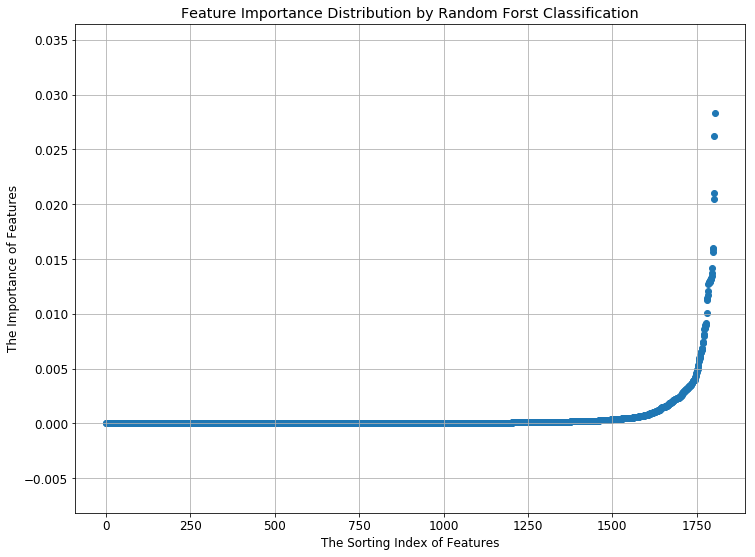

In [442]:
# feature importance distribution by random forst classification
plt.scatter(np.arange(len(rfc_imSorted)),rfc_imSorted)
plt.title('Feature Importance Distribution by Random Forst Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

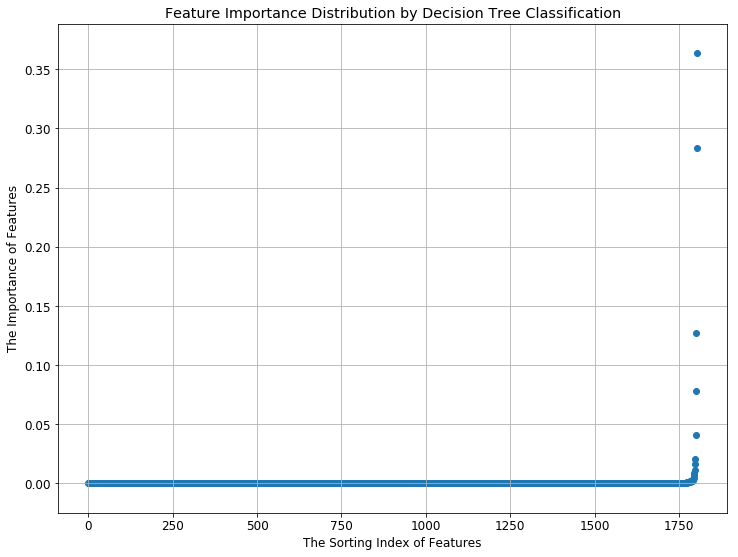

In [443]:
# feature importance distribution by decision tree classification
plt.scatter(np.arange(len(dtc_imSorted)),dtc_imSorted)
plt.title('Feature Importance Distribution by Decision Tree Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

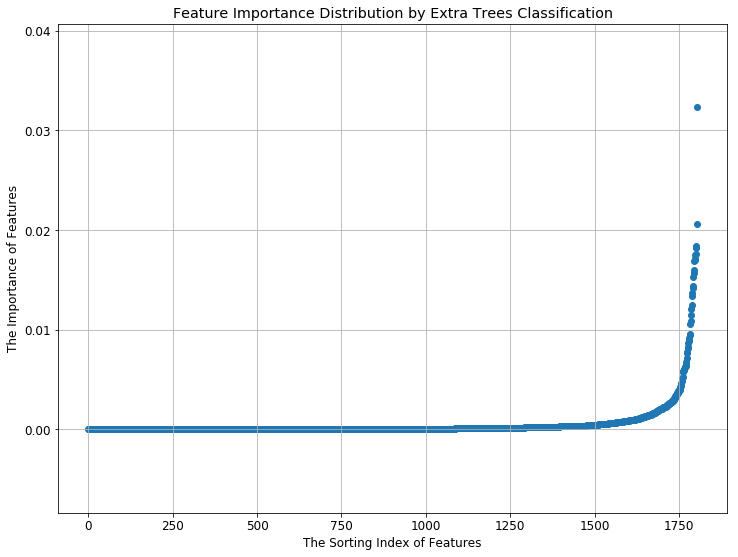

In [444]:
# feature importance distribution by extra trees classification
plt.scatter(np.arange(len(etc_imSorted)),etc_imSorted)
plt.title('Feature Importance Distribution by Extra Trees Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

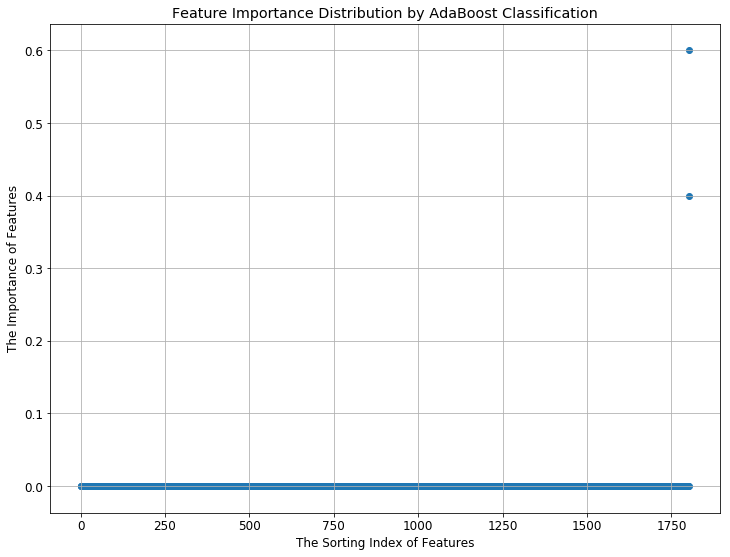

In [445]:
# feature importance distribution by AdaBoost classification
plt.scatter(np.arange(len(abc_imSorted)),abc_imSorted)
plt.title('Feature Importance Distribution by AdaBoost Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

### 7.4 Top 10 Useful Features

In [446]:
# get the top 10 useful features via random forest classification
print('Top 10 Useful Features via Random Forest Classification\n',rfc_dataImSorted[-10:len(rfc_dataImSorted)])

Top 10 Useful Features via Random Forest Classification
 ['string_len_counts_150_250' 'TB_f5' 'TB_b1' 'TB_e5'
 'ent_q_diff_diffs_2_median' 'strncpy' '_exit' 'HeapAlloc' 'TB_99' 'Img0.1']


In [447]:
# get the top 10 useful features via decision tree classification
print('Top 10 Useful Features via Decision Tree Classification\n',dtc_dataImSorted[-10:len(dtc_dataImSorted)])

Top 10 Useful Features via Decision Tree Classification
 ['asm_commands_in' 'VirtualAlloc' 'TB_d5' '.rsrc_por' 'ent_p_19' 'Offset.1'
 'Img50' 'dc_por' 'ent_q_diff_diffs_1_median' 'section_names_header']


In [448]:
# get the top 10 useful features via extra trees classification
print('Top 10 Useful Features via Extra Trees Classification\n',etc_dataImSorted[-10:len(etc_dataImSorted)])

Top 10 Useful Features via Extra Trees Classification
 ['Img47' 'ent_q_diff_diffs_2_median' 'Img28' 'ent_p_7' 'GetStringTypeA'
 'GetIconInfo' '_onexit' 'Img48' 'Img86' 'IsValidCodePage']


In [449]:
# get the top 10 useful features via AdaBoost classification
print('Top 10 Useful Features via AdaBoost Classification\n',abc_dataImSorted[-10:len(abc_dataImSorted)])

Top 10 Useful Features via AdaBoost Classification
 ['SetWindowsHookExA' 'EnumWindows' 'CreateBrushIndirect' 'IsIconic'
 'GetFileVersionInfoSizeA' 'MoveFileA' 'FileTimeToLocalFileTime' 'Img107'
 'Img37' 'ent_q_diff_diffs_1_median']


### 7.5 All Useful Features

In [450]:
# get all useful features via random forest classification
print('The Number of Useful Features via Random Forest Classification\n',len(rfc_dataImSorted[rfc_featureImportance>0]))
print('\nAll Useful Features via Random Forest Classification\n', rfc_dataImSorted[rfc_featureImportance>0])

The Number of Useful Features via Random Forest Classification
 1072

All Useful Features via Random Forest Classification
 ['SHGetFileInfoA' 'IsWindowVisible' 'LoadLibraryExA' ..., 'HeapAlloc'
 'TB_99' 'Img0.1']


In [451]:
# get all useful features via decision tree classification
print('The Number of Useful Features via Decision Tree Classification\n',len(dtc_dataImSorted[dtc_featureImportance>0]))
print('\nAll Useful Features via Decision Tree Classification\n', dtc_dataImSorted[dtc_featureImportance>0])

The Number of Useful Features via Decision Tree Classification
 54

All Useful Features via Decision Tree Classification
 ['TB_4e' 'TB_39' 'TB_32' 'TB_30' 'TB_2e' 'TB_2d' 'TB_1c' 'TB_6f' 'TB_bc'
 'TB_b3' 'TB_ae' 'TB_ce' 'TB_83' 'TB_a2' 'TB_9e' '__vbaFileOpen'
 'GetKeyNameTextA' 'ImageList_GetIconSize' 'CreateFileMappingA'
 'GetTextMetricsA' '__vbaVarMove' 'SetPixel' '__vbaLenBstr'
 'SetThreadLocale' 'IntersectClipRect' 'FileTimeToSystemTime' 'fopen'
 'Img3' 'Img0' 'string_len_counts_68' 'Img44.1' 'asm_commands_jmp'
 'VariantCopyInd' 'ent_q_diff_diffs_1_max' 'ent_q_diff_block_1_7'
 'ent_q_diff_diffs_19' 'ent_q_diff_diffs_17' 'BitBlt' 'CreateDirectoryA'
 'SelectPalette' 'PeekMessageA' 'IsWindow' '__setusermatherr'
 'SHGetPathFromIDListA' 'WindowFromPoint' '_CIexp' 'LoadBitmapA'
 'GetLocalTime' 'GetWindowThreadProcessId' 'LeaveCriticalSection'
 'UnhandledExceptionFilter' 'SetClassLongA' 'SetCapture' 'VariantCopy']


In [452]:
# get all useful features via extra trees classification
print('The Number of Useful Features via Extra Trees Classification\n',len(etc_dataImSorted[etc_featureImportance>0]))
print('\nAll Useful Features via Extra Trees Classification\n', etc_dataImSorted[etc_featureImportance>0])

The Number of Useful Features via Extra Trees Classification
 1311

All Useful Features via Extra Trees Classification
 ['GetTempPathW' 'GetClassLongA' '__vbaBoolVarNull' ..., '_onexit' 'Img86'
 'IsValidCodePage']


In [453]:
# get all useful features via AdaBoost classicaition
print('The Number of Useful Features via AdaBoost Classification\n',len(abc_dataImSorted[abc_featureImportance>0]))
print('\nAll Useful Features via AdaBoost Classification\n', abc_dataImSorted[abc_featureImportance>0])

The Number of Useful Features via AdaBoost Classification
 2

All Useful Features via AdaBoost Classification
 ['TB_ae' 'LocalAlloc']


### 7.6 All Useless Features

In [454]:
# get all useless features via random forest classification
print('The Number of Usefuless Features via Random Forest Classification\n',len(rfc_dataImSorted[rfc_featureImportance==0]))
print('\nAll Useless Features via Random Forest Classification\n', rfc_dataImSorted[rfc_featureImportance==0])

The Number of Usefuless Features via Random Forest Classification
 732

All Useless Features via Random Forest Classification
 ['string_len_counts_72' 'SetUnhandledExceptionFilter' 'SetTextColor'
 'GetFileAttributesA' 'RealizePalette' '_CIcos' 'PatBlt' 'GetPixel'
 'GlobalHandle' 'SetWindowPos' 'GetDesktopWindow' '_adj_fdivr_m16i'
 'GetPropA' 'RegEnumKeyA' '_adj_fdiv_m16i' '__vbaChkstk'
 'GetTimeZoneInformation' '__vbaFreeVar' '__vbaHresultCheckObj'
 'WindowFromPoint' 'RemovePropA' '__vbaStrMove' 'string_len_counts_63'
 '__vbaFreeVarList' '__vbaFreeStrList' '_adj_fptan' '_CItan'
 'IsWindowEnabled' 'SetWindowTextA' 'ScreenToClient' 'GetDiskFreeSpaceA'
 'GetClipBox' 'SetMenu' 'GetSystemDirectoryA' 'GlobalUnlock'
 'GetSystemMenu' 'EVENT_SINK_AddRef' 'string_len_counts_93' 'TB_84' 'GetDC'
 'TB_7d' 'string_len_counts_90' 'ImageList_Destroy' 'SetFileTime'
 'PtInRect' 'VariantClear' 'InternetReadFile' 'MapWindowPoints' 'GetFocus'
 'CreateSolidBrush' 'CloseClipboard' 'UnregisterClassA' 'Registe

In [455]:
# get all useless features via decision tree classification
print('The Number of Usefuless Features via Decision Tree Classification\n',len(dtc_dataImSorted[dtc_featureImportance==0]))
print('\nAll Useless Features via Decision Tree Classification\n', dtc_dataImSorted[dtc_featureImportance==0])

The Number of Usefuless Features via Decision Tree Classification
 1750

All Useless Features via Decision Tree Classification
 ['Virtual' 'TB_4d' 'TB_4c' ..., 'dc_por' 'ent_q_diff_diffs_1_median'
 'section_names_header']


In [456]:
# get all useless features via extra trees classification
print('The Number of Usefuless Features via Extra Trees Classification\n',len(etc_dataImSorted[etc_featureImportance==0]))
print('\nAll Useless Features via Extra Trees Classification\n', etc_dataImSorted[etc_featureImportance==0])

The Number of Usefuless Features via Extra Trees Classification
 493

All Useless Features via Extra Trees Classification
 ['htons' '__vbaAryVar' 'SetWindowExtEx' '__vbaStrVarCopy' 'CreateWindowExW'
 'Netbios' 'TranslateMDISysAccel' 'SetEnhMetaFileBits' 'GetEnhMetaFileBits'
 'SetWinMetaFileBits' 'memset' 'lstrlenW' '__vbaVarAdd' '__vbaVarCopy'
 'CreatePopupMenu' '__vbaAryCopy' 'CreateDCA' 'ExitThread' '__vbaVarTstEq'
 '.edata_por' '__vbaFileOpen' 'ImageList_Destroy' 'GetCurrentPositionEx'
 'MaskBlt' 'GetSystemMenu' 'SetParent' 'RegisterWindowMessageA'
 'CreateSolidBrush' 'WriteConsoleA' 'EqualRect' 'TB_c2' 'TB_da'
 'ent_q_diff_diffs_1' 'TB_e6' 'MapViewOfFile' 'MapVirtualKeyA' '_CIexp'
 'LoadImageA' 'asm_commands_cwd' 'Img98' 'DeleteMenu' 'locret'
 'string_len_counts_87' 'asm_commands_wait' 'RegisterClipboardFormatA'
 '__vbaOnError' 'CreateMenu' 'EnumThreadWindows' 'SetWindowOrgEx' 'setle'
 'SetScrollPos' 'SHFileOperationA' 'LONG' 'SetPixel' 'FrameRect' 'Img105'
 'string_len_counts_9' '

In [457]:
# get all useless features via AdaBoost classification
print('The Number of Usefuless Features via AdaBoost Classification\n',len(abc_dataImSorted[abc_featureImportance==0]))
print('\nAll Useless Features via AdaBoost Classification\n', abc_dataImSorted[abc_featureImportance==0])

The Number of Usefuless Features via AdaBoost Classification
 1802

All Useless Features via AdaBoost Classification
 ['Virtual' 'TB_5b' 'TB_5a' ..., 'Img107' 'Img37'
 'ent_q_diff_diffs_1_median']


# Part III. Model Comparison

## 1. Accuracy Comparison

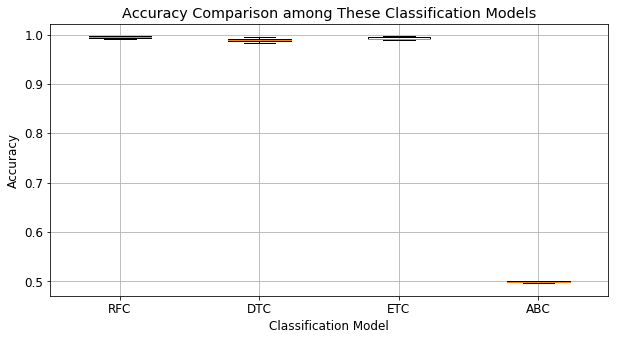

In [465]:
# accuracy statistic analysis and comparison of each classification method
plt.rcParams["figure.figsize"] = (10,5)
all_scores = np.vstack((rfc_scores, dtc_scores, etc_scores, abc_scores))
plt.boxplot(all_scores.T)
plt.title('Accuracy Comparison among These Classification Models')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(np.arange(4)+1,['RFC','DTC','ETC','ABC'])
plt.grid(True)
plt.show()

Due the accuracy value of AdaBoost classification, this figure cannot display very well. Hence, we pop the AdaBoost classidication result and re-draw again the accuracy comparison among last four classification methods.

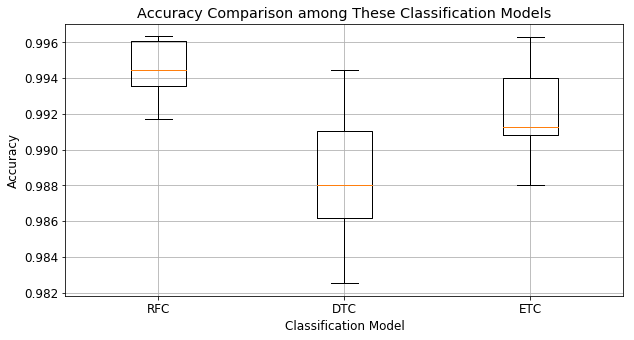

In [464]:
# accuracy statistic analysis and comparison of each classification method
all_scores = np.vstack((rfc_scores, dtc_scores, etc_scores))
plt.boxplot(all_scores.T)
plt.title('Accuracy Comparison among These Classification Models')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(np.arange(3)+1,['RFC','DTC','ETC'])
plt.grid(True)
plt.show()

## 2. Important Features Comparison

In [501]:
# extract the top10 features from different classifiers
top10_rfc = rfc_dataImSorted[-10:len(rfc_dataImSorted)]
top10_dtc = dtc_dataImSorted[-10:len(dtc_dataImSorted)]
top10_etc = etc_dataImSorted[-10:len(etc_dataImSorted)]
top10_abc = abc_dataImSorted[-10:len(abc_dataImSorted)]

In [533]:
# concatenate all top 10 features
top10 = np.concatenate((top10_rfc, top10_dtc, top10_etc, top10_abc), axis=0)
print('All Top 10 Features from Different Classifiers:\n',top10)

# unique the features and count the appearances of features
uni, count = np.unique(top10, return_counts=True)
uniFeatures = pd.DataFrame(count, index=uni, columns=['counts'])

print('\n\nUnique the Features and Theirs Counts\n')
uniFeatures.T.head()

All Top 10 Features from Different Classifiers:
 ['string_len_counts_150_250' 'TB_f5' 'TB_b1' 'TB_e5'
 'ent_q_diff_diffs_2_median' 'strncpy' '_exit' 'HeapAlloc' 'TB_99' 'Img0.1'
 'asm_commands_in' 'VirtualAlloc' 'TB_d5' '.rsrc_por' 'ent_p_19' 'Offset.1'
 'Img50' 'dc_por' 'ent_q_diff_diffs_1_median' 'section_names_header'
 'Img47' 'ent_q_diff_diffs_2_median' 'Img28' 'ent_p_7' 'GetStringTypeA'
 'GetIconInfo' '_onexit' 'Img48' 'Img86' 'IsValidCodePage'
 'SetWindowsHookExA' 'EnumWindows' 'CreateBrushIndirect' 'IsIconic'
 'GetFileVersionInfoSizeA' 'MoveFileA' 'FileTimeToLocalFileTime' 'Img107'
 'Img37' 'ent_q_diff_diffs_1_median']


Unique the Features and Theirs Counts



,.rsrc_por,CreateBrushIndirect,EnumWindows,FileTimeToLocalFileTime,GetFileVersionInfoSizeA,GetIconInfo,GetStringTypeA,HeapAlloc,Img0.1,Img107,...,_onexit,asm_commands_in,dc_por,ent_p_19,ent_p_7,ent_q_diff_diffs_1_median,ent_q_diff_diffs_2_median,section_names_header,string_len_counts_150_250,strncpy
counts,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,1,1,1


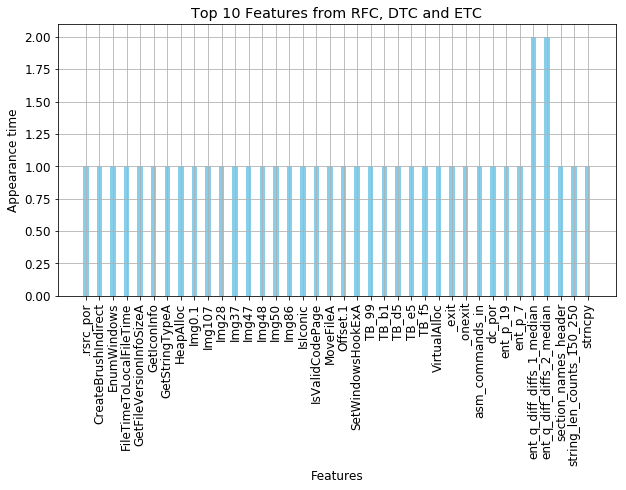

In [520]:
plt.bar(np.arange(uniFeatures.shape[0])*2,uniFeatures.counts, color='skyblue')
plt.title('Top 10 Features from RFC, DTC and ETC')
plt.xlabel('Features')
plt.ylabel('Appearance time')
plt.xticks(np.arange(uniFeatures.shape[0])*2,uniFeatures.index,rotation=90)
plt.grid(True)
plt.show()

# Part IV. Model Validation

## 1. Apply SVM to Evaluate the Features
### 1.1 Import Packages

In [526]:
from sklearn.svm import SVC

### 1.2 Selected Features from Different Classifiers

In [534]:
# random forest classification
rfc_selected = data[top10_rfc]
rfc_selected.head()

,string_len_counts_150_250,TB_f5,TB_b1,TB_e5,ent_q_diff_diffs_2_median,strncpy,_exit,HeapAlloc,TB_99,Img0.1
0,2.0,265,542,353,3.266095,1,8,6,632,195766.0
1,0.0,345,231,250,3.190804,0,2,0,260,14812.0
2,0.0,3233,2705,3179,3.066297,0,6,0,2888,115890.0
3,0.0,2685,2871,2511,3.711496,0,4,0,2529,128449.0
4,0.0,348,331,404,3.994911,0,0,0,357,19667.0


In [535]:
# decision tree classification
dtc_selected = data[top10_dtc]
dtc_selected.head()

,asm_commands_in,VirtualAlloc,TB_d5,.rsrc_por,ent_p_19,Offset.1,Img50,dc_por,ent_q_diff_diffs_1_median,section_names_header
0,2397,7,576,0.000000,3.610476,4198400,-0.011662,0.939565,3.303541,0.0
1,185,0,217,0.000196,3.994819,4198400,-0.068200,0.577673,3.977161,18.0
2,1234,5,2754,0.000000,3.356995,4198400,-0.002590,0.982791,3.086244,18.0
3,253,4,2482,0.000000,3.751938,4198400,-0.002597,0.949239,3.728404,18.0
4,113,5,317,0.002351,3.995484,268439552,-0.032245,0.221787,3.643115,19.0


In [536]:
# extra trees classification
etc_selected = data[top10_etc]
etc_selected.head()

,Img47,ent_q_diff_diffs_2_median,Img28,ent_p_7,GetStringTypeA,GetIconInfo,_onexit,Img48,Img86,IsValidCodePage
0,14.739358,3.266095,0.352451,3.264746,14,0,5,0.000009,4041.0,4
1,13.841109,3.190804,0.345745,3.483986,0,0,0,0.000062,351.0,0
2,13.337899,3.066297,0.373445,3.065914,0,0,10,0.000019,6549.0,0
3,15.313738,3.711496,0.039352,3.708903,0,0,0,0.000005,5421.0,0
4,14.616650,3.994911,0.224905,3.643114,0,0,5,0.000017,696.0,0


In [537]:
# Adaboost classification
abc_selected = data[top10_abc]
abc_selected.head()

,SetWindowsHookExA,EnumWindows,CreateBrushIndirect,IsIconic,GetFileVersionInfoSizeA,MoveFileA,FileTimeToLocalFileTime,Img107,Img37,ent_q_diff_diffs_1_median
0,0,0,0,3,0,0,3,162674.0,-0.066673,3.303541
1,0,0,0,0,0,0,0,6551.0,-0.069701,3.977161
2,0,0,0,0,0,0,0,12946.0,-0.043849,3.086244
3,0,0,0,0,0,0,0,98621.0,-0.009142,3.728404
4,0,0,0,0,0,0,0,11864.0,-0.034729,3.643115


### 1.3 Feature Evaluation via SVM

In [544]:
# random forest classification
# start to count
start = timeit.default_timer()

# random forest classification
svmRFC_clf = SVC(kernel='rbf', probability=True)
svmRFC_scores = cross_val_score(svmRFC_clf, rfc_selected, classType, cv=5)

# stop to count
stop = timeit.default_timer()
print ('svmRFC training time: ', stop - start) 

RFC training time:  140.96724501499557


In [545]:
print(svmRFC_scores)
print(svmRFC_scores.mean())

[ 0.27410468  0.27389706  0.275069    0.27373272  0.27419355]
0.274199401308


In [546]:
# decision tree classification
# start to count
start = timeit.default_timer()

# random forest classification
svmDTC_clf = SVC(kernel='rbf', probability=True)
svmDTC_scores = cross_val_score(svmDTC_clf, dtc_selected, classType, cv=5)

# stop to count
stop = timeit.default_timer()
print ('svmDTC training time: ', stop - start) 

DTC training time:  176.91835269599687


In [547]:
print(svmDTC_scores)
print(svmDTC_scores.mean())

[ 0.61065197  0.60294118  0.59015639  0.60460829  0.59953917]
0.601579401988


In [548]:
# Extra Trees classification
# start to count
start = timeit.default_timer()

# random forest classification
svmETC_clf = SVC(kernel='rbf', probability=True)
svmETC_scores = cross_val_score(svmETC_clf, etc_selected, classType, cv=5)

# stop to count
stop = timeit.default_timer()
print ('svmETC training time: ', stop - start) 

svmETC training time:  135.3473351010034


In [549]:
print(svmETC_scores)
print(svmETC_scores.mean())

[ 0.79522498  0.79411765  0.79208832  0.78986175  0.78617512]
0.791493561386


In [550]:
# AdaBoost classification
# start to count
start = timeit.default_timer()

# random forest classification
svmABC_clf = SVC(kernel='rbf', probability=True)
svmABC_scores = cross_val_score(svmABC_clf, abc_selected, classType, cv=5)

# stop to count
stop = timeit.default_timer()
print ('svmABC training time: ', stop - start) 

svmABC training time:  142.09263482400274


In [551]:
print(svmABC_scores)
print(svmABC_scores.mean())

[ 0.61616162  0.61259191  0.61775529  0.60368664  0.60737327]
0.61151374511


## 2. Comparison

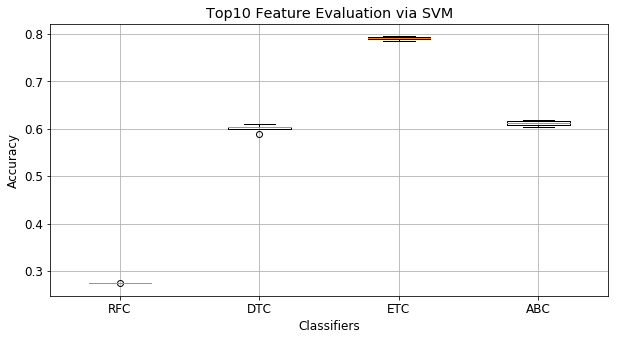

In [566]:
methods = ['RFC','DTC','ETC','ABC']
totalsvmAcc = np.vstack((svmRFC_scores, svmDTC_scores, svmETC_scores, svmABC_scores))

# plot the svm evaluation results via boxplot
plt.boxplot(totalsvmAcc.T)
plt.title('Top10 Feature Evaluation via SVM')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(np.arange(4)+1, methods)
plt.grid(True)
plt.show()

According to the results above, if we only select 10 features as our modeling features, then the Extra Trees Classification (ETC) showed the best result among the others. However, the RFC did not show good classification result. It could to be concluded that the numbers of features you used was important for random forest classification, hence, here are only 10 features, and this, leads to a low accuracy performance.

For using 10 features: the best feature selection classifiers in this study is ...

In [575]:
totalsvmAccAvg = np.zeros(4)

for i in range(0,4):
    totalsvmAccAvg[i] = totalsvmAcc[i,:].mean()

In [580]:
print('The Answer is "', methods[np.argmax(totalsvmAccAvg)],'" !')

The Answer is " ETC " !


# <b>The End</b>

### Chan, Chun-Hsiang @ Dept. of Geog., NTU